In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsRegressor

In [192]:
class KNeighborsRegressor:
    def __init__(self, n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.algorithm = algorithm
        self.leaf_size = leaf_size
        self.p = p
    
    def fit(self, a, b):
        a = np.array(a)
        b = np.array(b)
        if(a[:, 0].size < self.n_neighbors):
            raise Exception("train data array size smaller than n_neighbors! (n_neighbors="+str(self.n_neighbors)+")")
        if(a[:, 0].size != b.size):
            raise Exception("train input array size different with train target array size! (input array size : "+str(a.size)+" target array size : "+str(b.size)+")")
        self.input_data = a
        self.target_data = b
        
    def getDistances(self, data):
        distances_xy = self.input_data - data
        if self.p==1:
            return np.abs(distances_xy[:, 0])
        if self.p==2:
            return np.sqrt(np.power(distances_xy[:, 0], 2))
    
    def getWeights(self, data):
        if self.weights=='uniform':
            return np.ones_like(data)
        if self.weights=='distance':
            return np.ones_like(data) / self.getDistances(data)
    
    def predict(self, data):
        data = np.array(data).reshape(-1, 1)
        prediction_list = []
        for i in data:
            distances, indexes = self.kneighbors(i)
            prediction_score = (self.target_data[indexes].reshape(-1, 1) * self.getWeights(self.input_data)[indexes]).sum() 
            prediction_score /= self.getWeights(self.input_data)[indexes].sum()
            prediction_list.append(prediction_score)
        return np.array(prediction_list)
    
    def kneighbors(self, data):
        distances_arr = self.getDistances(data)
        index_rank = distances_arr.argsort()
        np.flip(index_rank)
        index_arr = index_rank[:self.n_neighbors]
        return distances_arr[index_arr], index_arr
    
    def score(self, test_input, test_target):
        test_result = self.predict(test_input)
        sst = np.power(test_target - np.ones_like(test_target)*np.average(test_target), 2).sum()
        ssr = np.power(test_result - test_target, 2).sum()
        return 1-ssr/sst
    
    

In [193]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [194]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [195]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
        
# 배열의 크기를 자동으로 지정하는 기능도 제공한다. 크기를 -1로 지정하면 나머지 원소 개수로 모두 채워진다. 이를 사용하면 배열의 원소의 개수를 정확히 모르더라도 크기를 쉽게 변경할 수 있다.  

In [196]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target)) # 0.992809406101064

# 결정계수 R

0.9928827044235266


In [197]:
print(knr.score(train_input, train_target))

# Overfitting : 훈련 셋의 점수보다 테스트 셋의 점수가 지나치게 낮다

0.9709175620626495


In [198]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) # 0.9804899950518966
print(knr.score(test_input, test_target)) # 0.9746459963987609

0.9805927924609602
0.9747223784694176


In [199]:
print(knr.predict([[100]]))

[1033.33333333]


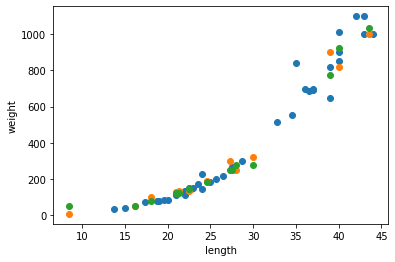

In [200]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.scatter(test_input, knr.predict(test_input))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()